# Свободный анализ данных. Употребление алкоголя учащимися. 23 вариант.

Для начала заимпортим необходимые библиотеки для нашего анализа данных.

In [1]:
import numpy as np # библиотека для эффективной работы с данными
import pandas as pd # библиотека для работы с наборами данных
import matplotlib.pyplot as plt # библиотека для визуализации

Прочтем данные из файла Excel.

In [2]:
data = pd.read_csv('student-por.csv')

data.shape

(649, 33)

Впервые увидев название своего набора данных, я захотел узнать, что прежде всего влияет на итоговый балл учащегося и задался вопросами:

- Какие параметры вносят наибольший вклад в итоговую оценку?
- Насколько сильно влияет употребление алкоголя на итоговый балл учащегося?

*Для начала подготовим данные для свободного анализа данных.*

Из практической работы №5, мы знаем, что пустых значений в нашем датасете нет, поэтому заполнять их нет необходимости.

Преобразование бинарных, категориальных и числовых переменных представлено ниже.

In [3]:
# Нормализованный набор данных

normal = data.copy()

# Преобразование бинарных признаков

normal['school'] = np.where(normal['school'] == 'GP', 1, 0) # школа ученика ("GP" - Габриэль Перейра или "MS" - Мусиньо да Силвейра)
normal['sex'] = np.where(normal['sex'] == 'M', 1, 0) # пол студента ("F" - женщина или "M" - мужчина)
normal['address'] = np.where(normal['address'] == 'U', 1, 0) # тип домашнего адреса студента ("U" - городской или "R" - сельский)
normal['famsize'] = np.where(normal['famsize'] == 'LE3', 1, 0) # размер семьи ('LE3' - меньше или равно 3 или 'GT3' - больше 3)
normal['Pstatus'] = np.where(normal['Pstatus'] == 'T', 1, 0) # статус совместного проживания родителей ("Т" - проживающий вместе или "А" - порознь)

# Бинарные признаки (да, нет)
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    normal[col] = np.where(data[col] == 'yes', 1, 0)
    
# Преобразование категориальных признаков
    
# Mjob - работа матери (номинальная: "учитель", связанная с "здравоохранением", гражданские "службы" (например, административные или полицейские), "at_home" или "другое")

normal['Mjob'] = np.where(normal['Mjob'] == 'teacher', 0, normal['Mjob'])
normal['Mjob'] = np.where(normal['Mjob'] == 'health', 1, normal['Mjob'])
normal['Mjob'] = np.where(normal['Mjob'] == 'services', 2, normal['Mjob'])
normal['Mjob'] = np.where(normal['Mjob'] == 'at_home', 3, normal['Mjob'])
normal['Mjob'] = np.where(normal['Mjob'] == 'other', 4, normal['Mjob'])

# Fjob - работа отца (номинальная: "учитель", связанная с "здравоохранением", гражданские "службы" (например, административные или полицейские), "at_home" или "другое")

normal['Fjob'] = np.where(normal['Fjob'] == 'teacher', 0, normal['Fjob'])
normal['Fjob'] = np.where(normal['Fjob'] == 'health', 1, normal['Fjob'])
normal['Fjob'] = np.where(normal['Fjob'] == 'services', 2, normal['Fjob'])
normal['Fjob'] = np.where(normal['Fjob'] == 'at_home', 3, normal['Fjob'])
normal['Fjob'] = np.where(normal['Fjob'] == 'other', 4, normal['Fjob'])

# reason - причина выбора этой школы (номинальная: близость к "дому", репутация школы, предпочтение "курса" или "другое")

normal['reason'] = np.where(normal['reason'] == 'home', 0, normal['reason'])
normal['reason'] = np.where(normal['reason'] == 'reputation', 1, normal['reason'])
normal['reason'] = np.where(normal['reason'] == 'course', 2, normal['reason'])
normal['reason'] = np.where(normal['reason'] == 'other', 3, normal['reason'])

# guardian - опекун учащегося (номинально: "мать", "отец" или "другой")

normal['guardian'] = np.where(normal['guardian'] == 'mother', 0, normal['guardian'])
normal['guardian'] = np.where(normal['guardian'] == 'father', 1, normal['guardian'])
normal['guardian'] = np.where(normal['guardian'] == 'other', 2, normal['guardian'])

Теперь попробуем построить линейную регрессию, где объясняемой переменной будет целевая переменная - (G3 - итоговая оценка ) на все признаки кроме оценок за промежуточные итоги - G1 и G2, потому что между целевой переменной и данными признаками присутствует высокая положительная корреляция (логично).

Также для нормального функционирования нашей линейной регресии выберем подмножество, где на всех признаках кроме целевого, применим алгоритм нормализации через СКО, а целевой признак превратим в бинарный.

In [4]:
prediction = normal.copy()
prediction['G3'] = np.where(prediction['G3'] > 10, 1, 0)
prediction = prediction.drop(['G1', 'G2'], axis = 1)
target = prediction.G3
samples = prediction.drop('G3', axis = 1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(samples, target, test_size= 0.3, random_state=4477)

 Ответим на вопрос, какие параметры вносят наибольший вклад в итоговую оценку, с помощью решения задачи классификации **Решающим деревом**.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#используем решающее дерево
for i in range(1, 20):
    tree = DecisionTreeClassifier(random_state=338, max_depth = i)
    tree = tree.fit(x_train, y_train)
    print(i,":\t",tree.score(x_test, y_test))

1 :	 0.7948717948717948
2 :	 0.8
3 :	 0.7692307692307693
4 :	 0.7948717948717948
5 :	 0.8051282051282052
6 :	 0.7538461538461538
7 :	 0.7487179487179487
8 :	 0.7282051282051282
9 :	 0.7333333333333333
10 :	 0.7282051282051282
11 :	 0.6923076923076923
12 :	 0.7025641025641025
13 :	 0.7128205128205128
14 :	 0.7128205128205128
15 :	 0.6923076923076923
16 :	 0.6923076923076923
17 :	 0.6923076923076923
18 :	 0.6923076923076923
19 :	 0.6923076923076923


В нашем случае лучшая высота дерева - 5, так как последующие увеличения ухудшают точность классификатора.

Далее посмотрим на точность нашего классификатора, оценив его по меткам accuracy, recall, precision, f1.

In [8]:
from sklearn.metrics import classification_report

decisionTree = DecisionTreeClassifier(random_state=338, max_depth = 5)
decisionTree = decisionTree.fit(x_train, y_train)

y_predict = decisionTree.predict(x_test)
report = classification_report(y_test, y_predict)

print(report)

              precision    recall  f1-score   support

           0       0.81      0.54      0.65        65
           1       0.80      0.94      0.87       130

    accuracy                           0.81       195
   macro avg       0.81      0.74      0.76       195
weighted avg       0.81      0.81      0.79       195



Видим, что решающее дерево довольно точно разделяет наши данные на 2 класса, поэтому данному классификатору можно верить.

Визуализируем классификатор Решающее дерево и найдем его границы классов. Попробуем оценить вклад, какого признака влияет на оценку учащегося.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Визуализация решающего дерева
plt.figure(figsize=(200, 100))
plot_tree(decisionTree, feature_names=x_train.columns,  class_names=["0", "1"],  filled=True, rounded=True)
plt.show()

Опишем характеристики некоторых объектов класса 1. failures <= 0.5, reason <= 1.5.

Опишем характеристики некоторых объектов класса 0. failures > 0.5, reason > 1.5.

*Таким образом, учащиеся, у которых количество прошлых сбоев класса низкое, а выбор данной школы зависел от близости к дому, престижности данной школы и от выбора курса, получали итоговую оценку выше среднего.*

*Учащиеся, у которых количество прошлых сбоев класса, наоборот, высокое, а выбор данной школы зависел от дргих причин, итоговая оценка была ниже среднего.*

**Проверим, какие параметры влияют на итоговую оценку в большей мере, с помощью другого метода, а также узнаем, какой вклад оказывает алкоголь на итоговый балл учащегося.**

Для этого построим ансамбль классификаторов RandomForestClassifier - это алгоритм случайного леса, предназначенный для решения задачи классификации.

В отличие от задачи классификации, где цель состоит в прогнозировании категориальной переменной, задача регрессии заключается в прогнозировании непрерывной числовой переменной.

**Именно данная модель сможет помочь в важности признаков, оказываемых на итоговый балл учащегося!**

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Создание объекта модели случайного леса
randomForest = RandomForestClassifier(n_estimators=300, random_state=16)

# Обучение классификатора на обучающей выборке
randomForest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=16)

Оценим точность регрессии, по которой сделаем вывод, можем ли мы доверять данному методу или нет.

Так как значения целевой переменной 0 и 1, а регрессия, не предназнаяена для разбиения на два класса, делаем это самостоятельно. Все, что больше 0.5 = 1, что меньше = 0.

In [12]:
from sklearn.metrics import accuracy_score, f1_score

# Предсказание классов на тестовой выборке
y_predict = randomForest.predict(x_test)

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_predict))

print(f'f1: {f1_score(y_test, y_predict):.2}')

Accuracy:  0.7794871794871795
f1: 0.85


Точность у регрессии высокая, а значит можем применять данный метод для определения важности каждого признака.

In [13]:
# Получение важности каждого признака
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': randomForest.feature_importances_})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

feature_importance_df

,Feature,Importance
14,failures,0.113271
29,absences,0.064224
0,school,0.055136
2,age,0.047872
20,higher,0.047619
6,Medu,0.043692
24,freetime,0.042945
7,Fedu,0.041127
27,Walc,0.039906
25,goout,0.038571


Из данной таблицы видно, что многие параметры, которые мы отобрали, как важные признаки, влияющие на итоговый балл учащегося здесь также присутствуют в порядке убывания.

*Однако стоит добавить, что важным параметром, который не был выделен **Решающим деревом**, является количество пропусков занятий в школе!*

Также теперь мы можем увидеть, какой вклад вносит употребление алкоголя учащимися на их итоговый балл.

Отсюда заметим, что употребление алкоголя в выходные дни (шестая по важности переменная), а употребление алкоголя в течение рабочего дня (одиннадцатая по важности переменная), оказывают довольно значимый вклад на итоговую оценку обучающегося.

**Важность мы оценили, но каким же образом употребление алкоголя влияет на итоговый балл учащегося? В худшую или лучшую сторону?**

Оценим с помощью построения линейной регрессии, где объясняемой переменной будет итоговый балл учащегося, а регрессорами употребление алкоголя учащимися в будние и выходные дни.

Проверяем показатель вздутии дисперсии, для того чтобы определить какой набор признаков имеет между собой зависимость.
Начинаю с самых значимы параметров, а именно: failures, absences, school, age, higher, freetime, Walc и Dalc.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_check(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
    return vif_data

vif_check(normal[['Walc', 'Dalc','failures', 'absences','school','age','higher','freetime']])

,feature,VIF
0,Walc,6.755245
1,Dalc,6.039581
2,failures,1.334578
3,absences,1.798101
4,school,3.037023
5,age,22.763156
6,higher,9.611146
7,freetime,9.916748


Параметры age, freetime, higher, Walc и Dalc имеют довольно большие показатели вздутия дисперсии, так что я их исключаю. И добавляю по одному самому значимому признаку в набор параметров.

In [60]:
print(vif_check(normal[['Walc','absences','school','failures']]),"\n=========================")
print(vif_check(normal[['Dalc','absences','school','failures']]),"\n=========================")
print(vif_check(normal[['higher','absences','school','failures']]),"\n=========================")
print(vif_check(normal[['freetime','absences','school','failures']]),"\n=========================")
print(vif_check(normal[['age','absences','school','failures']]),"\n=========================")

    feature       VIF
0      Walc  2.314292
1  absences  1.727325
2    school  2.126547
3  failures  1.160314 
    feature       VIF
0      Dalc  2.188592
1  absences  1.739996
2    school  2.007030
3  failures  1.164516 
    feature       VIF
0    higher  2.769356
1  absences  1.628217
2    school  2.868296
3  failures  1.112358 
    feature       VIF
0  freetime  2.757636
1  absences  1.658025
2    school  2.572524
3  failures  1.192411 
    feature       VIF
0       age  3.424804
1  absences  1.716636
2    school  2.942659
3  failures  1.202848 


In [21]:
# Если оценка будет больше 10, то отнесем учащегося к классу 1, иначе к классу 0.
target = np.where(normal['G3'] > 10, 1, 0)

# Нормализация данных через СКО.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
transformed = scaler.fit_transform(samples)

# Разделение набора данных на тестовую и тренировочную выборку.
x_train, x_test, y_train, y_test = train_test_split(transformed, target, test_size= 0.3, random_state=4477)

None

In [22]:
from sklearn import metrics

def linear_scorer(estimator, x, y):
    scorer_predictions = estimator.predict(x)

    scorer_predictions[scorer_predictions > 0.5] = 1
    scorer_predictions[scorer_predictions <= 0.5] = 0

    return metrics.accuracy_score(y, scorer_predictions)

def get_ceof(data,linmodel):
    coef = pd.DataFrame()
    coef["feature"] = data.columns
    coef["coefficient"] = np.transpose(linearRegression.coef_)
    return coef

Также как и в случае с регрессией Случайного леса обрабатываем точность линейной регрессии. Это доля угаданных объектов по бинарному признаку.

In [71]:
from sklearn.linear_model import LinearRegression

for col in ['age', 'freetime', 'higher', 'Walc', 'Dalc']:
    samples = normal.loc[:,normal.columns.isin([col,'absences','school','failures'])]
    transformed = scaler.fit_transform(samples)
    
    x_train, x_test, y_train, y_test = train_test_split(transformed, target, test_size= 0.3, random_state=4477)

    linmodel = LinearRegression()
    linmodel = linmodel.fit(x_train,y_train)

    print("Точность с ",col,": ",linear_scorer(linmodel, x_test, y_test)) # Выявление точности модел
    print(get_ceof(samples,linmodel),"\n=============================")

Точность с  age :  0.7743589743589744
    feature  coefficient
0    school     0.137304
1       age    -0.168968
2  failures    -0.039602
3  absences    -0.079214 
Точность с  freetime :  0.7743589743589744
    feature  coefficient
0    school     0.137304
1  failures    -0.168968
2  freetime    -0.039602
3  absences    -0.079214 
Точность с  higher :  0.7794871794871795
    feature  coefficient
0    school     0.137304
1  failures    -0.168968
2    higher    -0.039602
3  absences    -0.079214 
Точность с  Walc :  0.7846153846153846
    feature  coefficient
0    school     0.137304
1  failures    -0.168968
2      Walc    -0.039602
3  absences    -0.079214 
Точность с  Dalc :  0.7538461538461538
    feature  coefficient
0    school     0.137304
1  failures    -0.168968
2      Dalc    -0.039602
3  absences    -0.079214 


Я построил линейные регрессии по разным параметрам, и теперь можно заметить, что:
У переменной, отвечающей за школу большой положительнеый коэффициент. В школе Габриэль Перейра итоговоые оценки больше. Пропускать занятия, очевидно, будут плохо влиять. Употребление алкоголя, что в будние, что в выходные дни, негативно сказывается на итоговом балле обучающихся.
Что менее очевидно, это то, что у переменной с возрастом очень низкий (то есть отрицательный) коэффициент. Это может быть связано с усложнением программы в течении годов обучения. Также наличие свободного времени, желание получить высшее образование тоже отрицательно влияют на итоговую оценку.

In [91]:
samples = normal.loc[:,normal.columns.isin(['Walc','absences','school','failures'])]
transformed = scaler.fit_transform(samples)

x_train, x_test, y_train, y_test = train_test_split(transformed, target, test_size= 0.3, random_state=4477)

linearRegressionWalc = LinearRegression()
linearRegressionWalc = linearRegressionWalc.fit(x_train,y_train)

def formula(desc,data,coef):
    res = desc + " ~ "
    for i in range(0,len(coef)):
        res += str(np.round(np.abs(coef[i]),3)) + "*" + data.columns[i]
        if i < len(coef) - 1:
            res += " - " if coef[i] < 0 else " + "
    return res
        
print(formula("G3",samples,linearRegression.coef_))
print("Точность: ",linear_scorer(linearRegression, x_test, y_test))
get_ceof(samples,linearRegression) # Просмотр коэффициентов линейной регрессии

G3 ~ 0.137*school + 0.169*failures - 0.04*Walc - 0.079*absences
Точность:  0.7897435897435897


,feature,coefficient
0,school,0.137304
1,failures,-0.168968
2,Walc,-0.039602
3,absences,-0.079214


Результат неплохой. Мы выявили более точную зависимость от потребления алкоголя (Walc)

Вводу натуральный логарифм на переменную absences

In [92]:
samples = normal.loc[:,normal.columns.isin(['Walc','absences','school','failures'])]
transformed = scaler.fit_transform(samples)
column_id = samples.columns.get_loc("absences")
transformed[column_id] = np.log(transformed[column_id] + 5)

x_train, x_test, y_train, y_test = train_test_split(transformed, target, test_size= 0.3, random_state=4477)

linearRegression = LinearRegression()
linearRegression = linearRegression.fit(x_train,y_train)

print(formula("G3",samples,linearRegression.coef_))
print("Точность: ",linear_scorer(linearRegression, x_test, y_test))
get_ceof(samples,linearRegression)

G3 ~ 0.137*school + 0.169*failures - 0.04*Walc - 0.079*absences
Точность:  0.7897435897435897


,feature,coefficient
0,school,0.137304
1,failures,-0.168968
2,Walc,-0.039602
3,absences,-0.079214


    Перебираю степени регрессора absences в линейной регрессии

In [50]:
for i in np.arange(0.1, 3.0, 0.1):
    samples = normal.loc[:,normal.columns.isin(['Walc','absences','school','failures'])]
    transformed = scaler.fit_transform(samples)
    column_id = samples.columns.get_loc("absences")
    transformed[column_id] = np.power(transformed[column_id] + 3,i)

    x_train, x_test, y_train, y_test = train_test_split(transformed, target, test_size= 0.3, random_state=4477)

    linmodel = LinearRegression()
    linmodel = linmodel.fit(x_train,y_train)

    print("Степень: ",np.round(i,2),"\tТочность: ",linear_scorer(linmodel, x_test, y_test))

Степень:  0.1 	Точность:  0.7846153846153846
Степень:  0.2 	Точность:  0.7846153846153846
Степень:  0.3 	Точность:  0.7897435897435897
Степень:  0.4 	Точность:  0.7897435897435897
Степень:  0.5 	Точность:  0.7897435897435897
Степень:  0.6 	Точность:  0.7897435897435897
Степень:  0.7 	Точность:  0.7897435897435897
Степень:  0.8 	Точность:  0.7897435897435897
Степень:  0.9 	Точность:  0.7897435897435897
Степень:  1.0 	Точность:  0.7897435897435897
Степень:  1.1 	Точность:  0.7897435897435897
Степень:  1.2 	Точность:  0.7897435897435897
Степень:  1.3 	Точность:  0.7897435897435897
Степень:  1.4 	Точность:  0.7897435897435897
Степень:  1.5 	Точность:  0.7897435897435897
Степень:  1.6 	Точность:  0.7897435897435897
Степень:  1.7 	Точность:  0.7897435897435897
Степень:  1.8 	Точность:  0.7897435897435897
Степень:  1.9 	Точность:  0.7897435897435897
Степень:  2.0 	Точность:  0.7897435897435897
Степень:  2.1 	Точность:  0.7846153846153846
Степень:  2.2 	Точность:  0.7846153846153846
Степень:  

Лучшая точность достигается при степени равной единице, так что здесь признак остаётся сам по себе.

In [94]:
samples = normal.loc[:,normal.columns.isin(['age','absences','school','failures'])]
transformed = scaler.fit_transform(samples)
column_id = samples.columns.get_loc("age")
transformed[column_id] = np.log(transformed[column_id] + 5)

x_train, x_test, y_train, y_test = train_test_split(transformed, target, test_size= 0.3, random_state=4477)

linearRegressionLogAge = LinearRegression()
linearRegressionLogAge = linearRegressionLogAge.fit(x_train,y_train)

print(formula("G3",samples,linearRegression.coef_))
print("Точность: ",linear_scorer(linearRegressionLogAge, x_test, y_test))
get_ceof(samples,linearRegressionLogAge)

G3 ~ 0.137*school + 0.169*age - 0.04*failures - 0.079*absences
Точность:  0.7743589743589744


,feature,coefficient
0,school,0.137304
1,age,-0.168968
2,failures,-0.039602
3,absences,-0.079214


In [41]:
for i in np.arange(0.5, 4.0, 0.1):
    samples = normal.loc[:,normal.columns.isin(['age','absences','school','failures'])]
    transformed = scaler.fit_transform(samples)
    column_id = samples.columns.get_loc("age")
    transformed[column_id] = np.power(transformed[column_id] + 3,i)

    x_train, x_test, y_train, y_test = train_test_split(transformed, target, test_size= 0.3, random_state=4477)

    linearRegression = LinearRegression()
    linearRegression = linearRegression.fit(x_train,y_train)

    print("Степень: ",np.round(i,2),"\tТочность: ",linear_scorer(linearRegression, x_test, y_test))

Степень:  0.5 	Точность:  0.7743589743589744
Степень:  0.6 	Точность:  0.7743589743589744
Степень:  0.7 	Точность:  0.7743589743589744
Степень:  0.8 	Точность:  0.7743589743589744
Степень:  0.9 	Точность:  0.7743589743589744
Степень:  1.0 	Точность:  0.7743589743589744
Степень:  1.1 	Точность:  0.7743589743589744
Степень:  1.2 	Точность:  0.7743589743589744
Степень:  1.3 	Точность:  0.7743589743589744
Степень:  1.4 	Точность:  0.7743589743589744
Степень:  1.5 	Точность:  0.7743589743589744
Степень:  1.6 	Точность:  0.7743589743589744
Степень:  1.7 	Точность:  0.7743589743589744
Степень:  1.8 	Точность:  0.7743589743589744
Степень:  1.9 	Точность:  0.7743589743589744
Степень:  2.0 	Точность:  0.7743589743589744
Степень:  2.1 	Точность:  0.7743589743589744
Степень:  2.2 	Точность:  0.7743589743589744
Степень:  2.3 	Точность:  0.7743589743589744
Степень:  2.4 	Точность:  0.7743589743589744
Степень:  2.5 	Точность:  0.7794871794871795
Степень:  2.6 	Точность:  0.7794871794871795
Степень:  

In [95]:
samples = normal.loc[:,normal.columns.isin(['age','absences','school','failures'])]
transformed = scaler.fit_transform(samples)
column_id = samples.columns.get_loc("age")
transformed[column_id] = np.power(transformed[column_id] + 3,2.8)

x_train, x_test, y_train, y_test = train_test_split(transformed, target, test_size= 0.3, random_state=4477)

linearRegression = LinearRegression()
linearRegression = linearRegression.fit(x_train,y_train)

print(formula("G3",samples,linearRegression.coef_))
print("Точность: ",linear_scorer(linearRegression, x_test, y_test))

G3 ~ 0.12*school + 0.016*age - 0.173*failures - 0.087*absences
Точность:  0.7846153846153846


In [87]:
samples = normal.loc[:,normal.columns.isin(['age','absences','school','failures'])]
samples["age_times_absences"] = samples["age"] * samples["absences"]
samples.drop(['age','absences'],axis=1,inplace=True)
transformed = scaler.fit_transform(samples)

x_train, x_test, y_train, y_test = train_test_split(transformed, target, test_size= 0.3, random_state=4477)

linearRegression = LinearRegression()
linearRegression = linearRegression.fit(x_train,y_train)

print(formula("G3",samples,linearRegression.coef_))
print("Точность: ",linear_scorer(linearRegression, x_test, y_test))
get_ceof(samples,linearRegression)

<ipython-input-87-c3c63fa0b460>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples["age_times_absences"] = samples["age"] * samples["absences"]
<ipython-input-87-c3c63fa0b460>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples.drop(['age','absences'],axis=1,inplace=True)


G3 ~ 0.136*school + 0.169*failures - 0.087*age_times_absences
Точность:  0.7743589743589744


,feature,coefficient
0,school,0.136456
1,failures,-0.168542
2,age_times_absences,-0.087097


Проанализировав много моделей, которые содержат в себе логарифмы, степени и произведения регрессоров, я пришёл к модели, которая зависит от потребления алкоголя как самой удачной. Это как раз то, что я стараюсь объяснить.

In [88]:
samples = normal.loc[:,normal.columns.isin(['Walc','absences','school','failures'])]
transformed = scaler.fit_transform(samples)
column_id = samples.columns.get_loc("absences")
transformed[column_id] = np.log(transformed[column_id] + 5)

x_train, x_test, y_train, y_test = train_test_split(transformed, target, test_size= 0.3, random_state=4477)

linearRegression = LinearRegression()
linearRegression = linearRegression.fit(x_train,y_train)

print(formula("G3",samples,linearRegression.coef_))
print("Точность: ",linear_scorer(linearRegression, x_test, y_test))
get_ceof(samples,linearRegression)

G3 ~ 0.137*school + 0.169*failures - 0.04*Walc - 0.079*absences
Точность:  0.7897435897435897


,feature,coefficient
0,school,0.137304
1,failures,-0.168968
2,Walc,-0.039602
3,absences,-0.079214


# Приступим к задаче кластеризации.

Для этого попробуем найти какие-нибудь кластеры с помощью алгоритмов DBSCAN, K-means в наборе данных.

In [22]:
normal_for_clasters = normal.copy()

# Если оценка будет больше 10, то отнесем учащегося к классу 1, иначе к классу 0.

normal_for_clasters['G3'] = np.where(normal_for_clasters['G3'] >= 10, 1, 0)

# Удаление промежуточных оценок:

normal_for_clasters = normal_for_clasters.drop(['G1', 'G2'], axis = 1)

# Разделение набора данных на тестовую и тренировочную выборку.

from sklearn.model_selection import train_test_split

target = normal_for_clasters.G3
data_sel = normal_for_clasters.drop('G3', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(data_sel, target, test_size= 0.3, random_state=4477)

# Нормализация данных через СКО.

data_sel_sc = scaler.fit_transform(data_sel)

print(data_sel_sc)

[[ 0.73094388 -0.83337685  1.03169516 ... -0.99769466 -0.3710422
   0.07343336]
 [ 0.73094388 -0.83337685  0.21013668 ... -0.99769466 -0.3710422
  -0.35786305]
 [ 0.73094388 -0.83337685 -1.43298028 ...  0.56067799 -0.3710422
   0.50472977]
 ...
 [-1.36809408 -0.83337685  1.03169516 ... -0.99769466  1.01290255
   0.50472977]
 [-1.36809408  1.19993734  0.21013668 ...  1.33986431 -1.06301457
   0.50472977]
 [-1.36809408  1.19993734  1.03169516 ...  1.33986431  1.01290255
   0.07343336]]


Попробуем воспользоваться методом PCA для снижения размерности.

In [23]:
from sklearn.decomposition import PCA

for i in range(data_sel_sc.shape[1] + 1): 
    pca2 = PCA(n_components = i)
    pca2.fit(data_sel_sc)
    print(i, sum(pca2.explained_variance_ratio_))

0 0
1 0.10627107283791244
2 0.18931714801997368
3 0.24740709473635034
4 0.29648553700287766
5 0.3435090924890675
6 0.38764557855563475
7 0.42883953129705266
8 0.4680804621653648
9 0.504961602212148
10 0.5397636731899003
11 0.5733300052551246
12 0.6064460113156792
13 0.6375714730657542
14 0.6684306948459043
15 0.6977184734001711
16 0.7257984046781685
17 0.7530113378807411
18 0.7795969107591608
19 0.8051508477307528
20 0.8287419689117017
21 0.8513551530027045
22 0.872342468687057
23 0.8929562348749961
24 0.9127466858594898
25 0.930852517682093
26 0.9479693445785983
27 0.9646966244648313
28 0.9802551258904242
29 0.99155506630362
30 0.9999999999999997


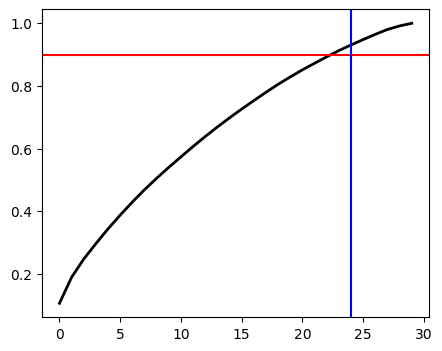

In [24]:
plt.figure(figsize=(5,4))
plt.plot(np.cumsum(pca2.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, c='r')
plt.axvline(24, c='b')

Снизим нашу размерность до 24 главных компонент и поищем для них кластеры с помощью различных алгоритмов.

/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


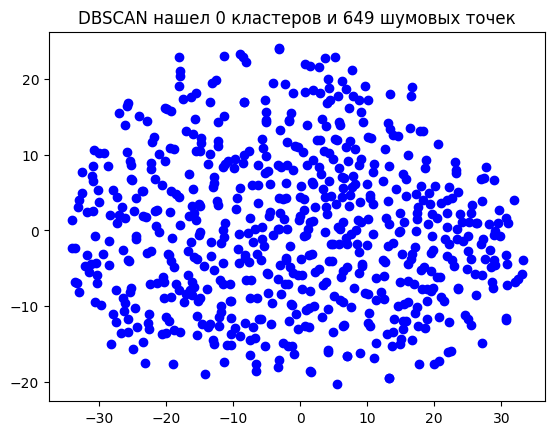

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

#снизим размерность данных при помощи метода главных компонент
pca = PCA(n_components = 24).fit(data_sel)
pdata = pca.transform(data_sel_sc)

#используем dbscan для обнаружения кластеров
dbscan = DBSCAN(eps = 1, min_samples = 5)
dbscan.fit(pdata)
labels = dbscan.labels_

#используем tsne для снижения размерности
tsne = TSNE()
pca_2d = tsne.fit_transform(pdata)

#визуализируем кластеры
for label in set(labels):
    if label == -1:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color='blue')
    else:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color=plt.cm.jet(label / np.max(labels + 1)))

plt.title('DBSCAN нашел {} кластеров и {} шумовых точек'.format(len(set(labels)) - (1 if -1 in labels else 0),
                                                                np.sum(labels == -1)))
plt.show()

Отсюда видим, что в наборе данных отсутствуют явно выраженные кластеры, и DBSCAN не смог разбить их на отдельные группы.

Попробуем применить алгоритм K-means для поиска кластеров.

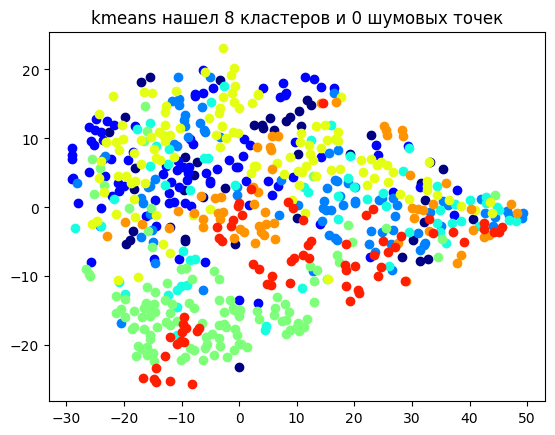

In [26]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

kmeans = KMeans(n_init = 'auto', random_state = 157)
kmeans.fit(data_sel_sc)
labels = kmeans.labels_

tsne = TSNE()
pca_2d = tsne.fit_transform(data_sel)

for label in set(labels):
    if label == -1:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color='blue')
    else:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color=plt.cm.jet(label / np.max(labels + 1)))

plt.title('kmeans нашел {} кластеров и {} шумовых точек'.format(len(set(labels)) - (1 if -1 in labels else 0),
                                                                np.sum(labels == -1)))
plt.show()

Отсюда видим, что K-means чуть лучше справился с задачей кластеризации и смог выделить некоторые кластеры.

Однако четкого разделения на кластеры мы не видим, поэтому попробуем применить алгоритм иерархической кластеризации.

/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


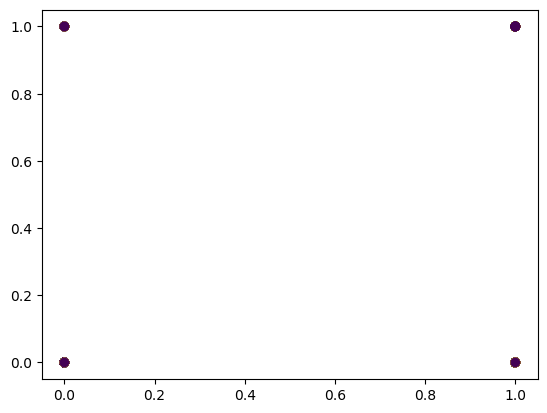

In [27]:
from sklearn.cluster import AgglomerativeClustering

# Признаки для кластеризации
X = data_sel.values

# Создание объекта иерархической кластеризации
clustering = AgglomerativeClustering(linkage='ward', affinity='euclidean')

# Применение иерархической кластеризации на данных
labels = clustering.fit_predict(data_sel_sc)

# Вывод результатов кластеризации
cluster_results = pd.DataFrame({'Cluster': labels})

# Визуализация кластеров (если требуется)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()

Попробуем применить метод локтя.

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` w

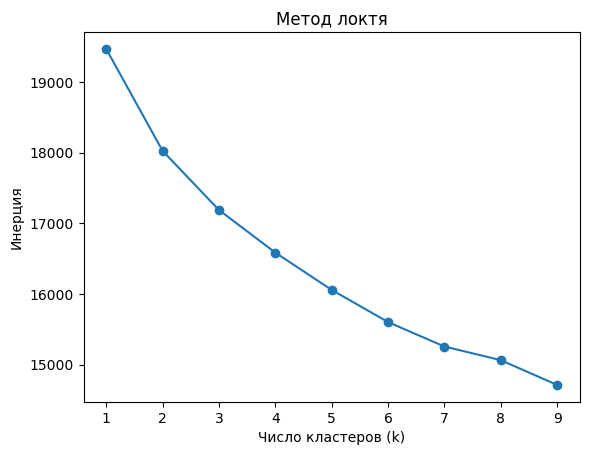

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Создание списка для сохранения значения инерции (сумма квадратов расстояний до ближайшего центроида) для разных значений k
inertia = []

# Задание разных значений k
k_values = range(1, 10)

# Вычисление инерции для каждого значения k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_sel_sc)
    inertia.append(kmeans.inertia_)

# Построение графика локтя
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Инерция')
plt.title('Метод локтя')
plt.show()

Здесь также наблюдаем, что кластеры не выделились.

**Скорее всего кластеры не выделяются, потому что в наборе данных довольно много признаков, которые не коррелируют между собой, поэтому они не могут разбиться на определенные группы. Также в наборе данных очень много разнообразных признаков, которые могут описать каждого человека, как личность, поэтому очень трудно собрать объекты в какой-нибудь кластер.**